1. Загрузите файл HR.csv в pandas dataframe

In [1]:
import pandas as pd
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
data_hr = pd.read_csv('HR.csv')
data_hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


2. Рассчитайте основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение)

In [2]:
data_hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


3. Рассчитайте и визуализировать корреляционную матрицу для
количественных переменных.
Определите две самые скоррелированные и две наименее
скоррелированные переменные

In [3]:
!pip install phik
import phik
from phik.report import plot_correlation_matrix

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 12.9 MB/s eta 0:00:00


In [4]:
phik_overview = data_hr.phik_matrix()
phik_overview

interval columns not set, guessing: ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years']


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
satisfaction_level,1.000000,0.524186,0.671192,0.632964,0.434504,0.126103,0.794751,0.048870,0.077827,0.103511
last_evaluation,0.524186,1.000000,0.405454,0.423943,0.277426,0.060155,0.445802,0.062559,0.065680,0.076748
number_project,0.671192,0.405454,1.000000,0.520013,0.418083,0.127437,0.793722,0.042565,0.044844,0.156156
average_montly_hours,0.632964,0.423943,0.520013,1.000000,0.327967,0.089761,0.572472,0.017737,0.099999,0.082845
time_spend_company,0.434504,0.277426,0.418083,0.327967,1.000000,0.089437,0.497255,0.192891,0.167530,0.150826
Work_accident,0.126103,0.060155,0.127437,0.089761,0.089437,1.000000,0.239838,0.059210,0.030992,0.000000
left,0.794751,0.445802,0.793722,0.572472,0.497255,0.239838,1.000000,0.095205,0.093995,0.096011
promotion_last_5years,0.048870,0.062559,0.042565,0.017737,0.192891,0.059210,0.095205,1.000000,0.197001,0.059505
department,0.077827,0.065680,0.044844,0.099999,0.167530,0.030992,0.093995,0.197001,1.000000,0.245498
salary,0.103511,0.076748,0.156156,0.082845,0.150826,0.000000,0.096011,0.059505,0.245498,1.000000


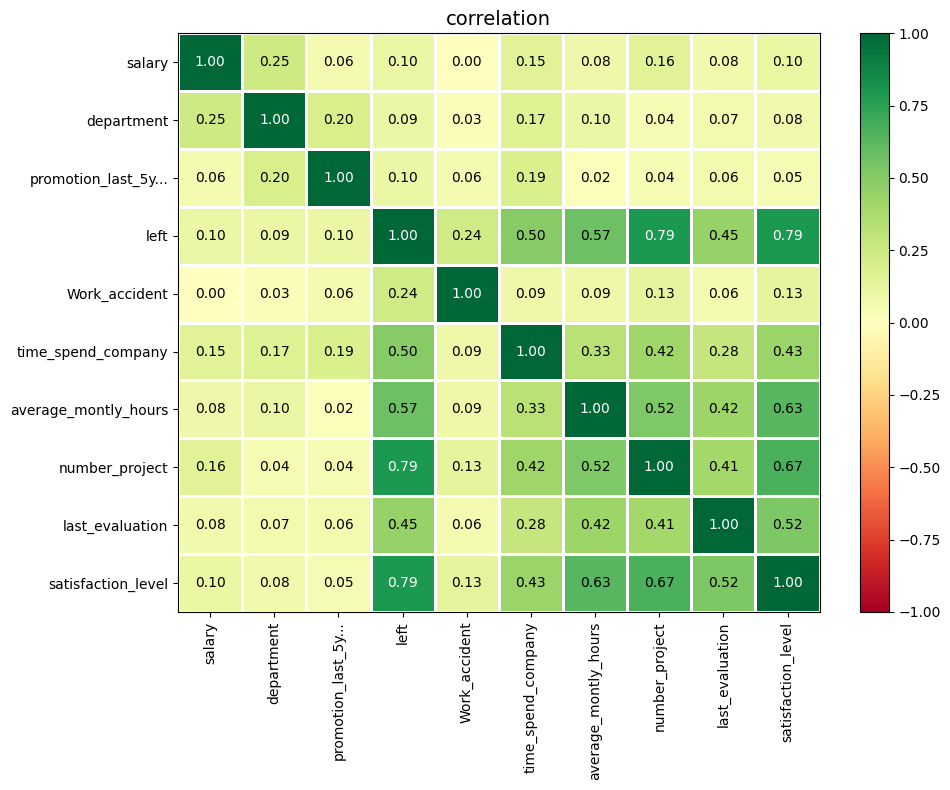

In [5]:
plot_correlation_matrix(phik_overview.values, x_labels=phik_overview.columns, y_labels=phik_overview.index, figsize=(10, 8))

#две самые скоррелированные - это left (увольнение) /number_projects(количество выполненных проектов) и left (увольнение) /satisfaction_level (уровень удовлетворенности)
#две наименее скоррелированные переменные - work accident (Происходили ли несчастные случаи на рабочем месте с сотрудником) / salary и work accident / department

4. Рассчитайте сколько сотрудников работает в каждом
департаменте.

In [6]:
department_count = data_hr.groupby('department').size()
print (department_count)

department
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
dtype: int64


5. Показать распределение сотрудников по зарплатам.

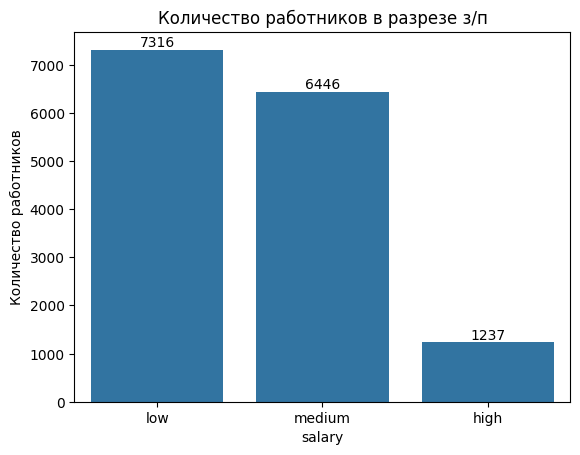

In [7]:
ax = sns.countplot(data=data_hr, x="salary")
ax.bar_label(ax.containers[0])
plt.title("Количество работников в разрезе з/п")
plt.ylabel("Количество работников")
plt.show()

6. Показать распределение сотрудников по зарплатам в каждом
департаменте по отдельности

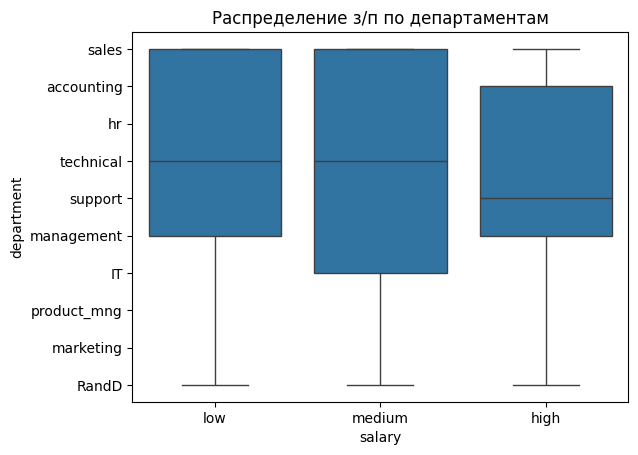

In [8]:
sns.boxplot(data=data_hr, x='salary', y='department')
plt.title("Распределение з/п по департаментам")
plt.show()

7. Проверить гипотезу, что сотрудники с высоким окладом
проводят на работе больше времени, чем сотрудники с низким
окладом

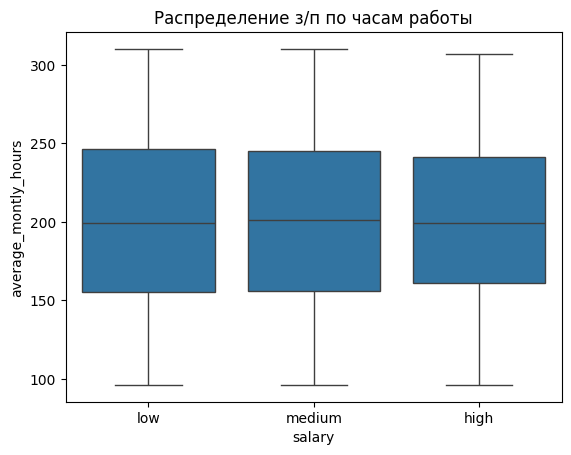

In [9]:
sns.boxplot(data=data_hr, x='salary', y='average_montly_hours')
plt.title("Распределение з/п по часам работы")
plt.show()

In [10]:
from scipy import stats

group_low = data_hr[data_hr['salary'] == 'low']['average_montly_hours']
group_high = data_hr[data_hr['salary'] == 'high']['average_montly_hours']

t_stat, p_value = stats.ttest_ind(group_low, group_high)
print(f't-statistic: {t_stat}, p-value: {p_value}')
alpha = 0.05
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: сотрудники с высоким окладом проводят больше времени на работе.")
else:
    print("Нет оснований отвергать нулевую гипотезу: нет доказательств, что сотрудники с высоким окладом проводят больше времени на работе.")

t-statistic: 0.7288680398062308, p-value: 0.4661023478267259
Нет оснований отвергать нулевую гипотезу: нет доказательств, что сотрудники с высоким окладом проводят больше времени на работе.


8. Рассчитать следующие показатели среди уволившихся и не
уволившихся сотрудников (по отдельности):
● Доля сотрудников с повышением за последние 5 лет
● Средняя степень удовлетворенности
● Среднее количество проектов

In [37]:
fired_group = data_hr[data_hr['left'] == 1]
notfired_group = data_hr[data_hr['left'] == 0]

fired_count = fired_group.shape[0]
fired_promotion_count = fired_group['promotion_last_5years'].sum()
fired_promotion_rate = fired_promotion_count / fired_count
fired_avg_satisfaction = fired_group['satisfaction_level'].mean()
fired_avg_projects = fired_group['number_project'].mean()

not_fired_count = notfired_group.shape[0]
not_fired_promotion_count = notfired_group['promotion_last_5years'].sum()
not_fired_promotion_rate = not_fired_promotion_count / not_fired_count
not_fired_avg_satisfaction = notfired_group['satisfaction_level'].mean()
not_fired_avg_projects = notfired_group['number_project'].mean()

print("Уволившиеся:")
print(f"Доля сотрудников с повышением: {fired_promotion_rate:.2f}")
print(f"Средняя степень удовлетворенности: {fired_avg_satisfaction:.2f}")
print(f"Среднее количество проектов: {fired_avg_projects:.2f}")

print("\nНе уволившиеся:")
print(f"Доля сотрудников с повышением: {not_fired_promotion_rate:.2f}")
print(f"Средняя степень удовлетворенности: {not_fired_avg_satisfaction:.2f}")
print(f"Среднее количество проектов: {not_fired_avg_projects:.2f}")

Уволившиеся:
Доля сотрудников с повышением: 0.01
Средняя степень удовлетворенности: 0.44
Среднее количество проектов: 3.86

Не уволившиеся:
Доля сотрудников с повышением: 0.03
Средняя степень удовлетворенности: 0.67
Среднее количество проектов: 3.79
